In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [4]:
image_size = 256
batch_size = 64
epochs = 100
channels = 3

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("tomato/train")

Found 10000 files belonging to 10 classes.


In [8]:
class_names = dataset.class_names
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [9]:
len(dataset)

313

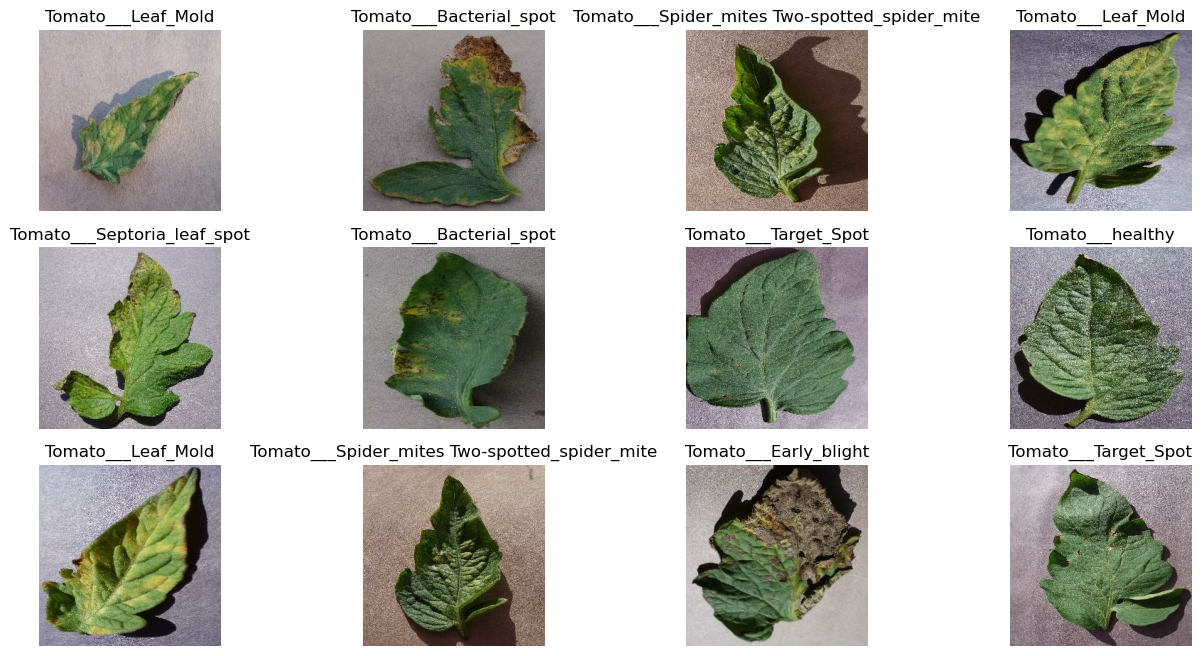

In [15]:
plt.figure(figsize=(16,8))
for image_label, batch_label in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_label[i].numpy().astype("uint8"))
        plt.title(class_names[batch_label[i]])
        plt.axis("off")

In [16]:
#Defining function for train-validation-test split
def split(ds, train_split = 0.8, val_split = 0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [17]:
train_ds, val_ds, test_ds = split(dataset)

In [19]:
print("Train dataset size: ", len(train_ds))
print("Val dataset size: ", len(val_ds))
print("Test dataset size: ", len(test_ds))

Train dataset size:  250
Val dataset size:  31
Test dataset size:  32


## Data Preprocessing

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size, image_size),
    layers.experimental.preprocessing.Rescaling(1.0 / 255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])